In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2

train = np.load("train_data.npy")

In [44]:
correct_answers = np.load("train_labels.npy")

# for i in range(0, len(train[1], 3)):
# DONT have to read it in manually - use reshape
X_train = np.zeros( (10000, 32, 32, 3) )

i=0
for row in train:
    #row = train[i,:]
    img = np.array(row).reshape(32, 32, 3)
    X_train[i] = img
    i += 1

# img_test = np.array(train[1]).reshape(32, 32, 3)
# plt.imshow(img_test)

In [58]:
# Defining the structure of the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train)
insert_shape = (32,32,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape= insert_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape= insert_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape= insert_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

# final layer has to conform to output. 1 neuron- bird or non-bird
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

#model.summary()

In [59]:
# setting up for training
batch_size = 16

results = model.fit(X_train, correct_answers, batch_size=16, epochs=15, validation_split=0.2)
results.history['accuracy']


Epoch 1/15
500/500 [==============================] - 5s 9ms/step - loss: 0.8470 - accuracy: 0.5284 - val_loss: 0.7065 - val_accuracy: 0.5660
Epoch 2/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6868 - accuracy: 0.5416 - val_loss: 0.6720 - val_accuracy: 0.5605
Epoch 3/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6763 - accuracy: 0.5616 - val_loss: 0.6633 - val_accuracy: 0.5895
Epoch 4/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6707 - accuracy: 0.5756 - val_loss: 0.6685 - val_accuracy: 0.5635
Epoch 5/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6623 - accuracy: 0.5867 - val_loss: 0.6639 - val_accuracy: 0.5850
Epoch 6/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6468 - accuracy: 0.6234 - val_loss: 0.6039 - val_accuracy: 0.6745
Epoch 7/15
500/500 [==============================] - 4s 8ms/step - loss: 0.6017 - accuracy: 0.6810 - val_loss: 0.6040 - val_accuracy: 0.6795
Epoch 

[0.5283750295639038,
 0.5416250228881836,
 0.5616250038146973,
 0.5756250023841858,
 0.5867499709129333,
 0.6233749985694885,
 0.6809999942779541,
 0.7145000100135803,
 0.7275000214576721,
 0.7390000224113464,
 0.749750018119812,
 0.7615000009536743,
 0.7749999761581421,
 0.7822499871253967,
 0.8019999861717224]

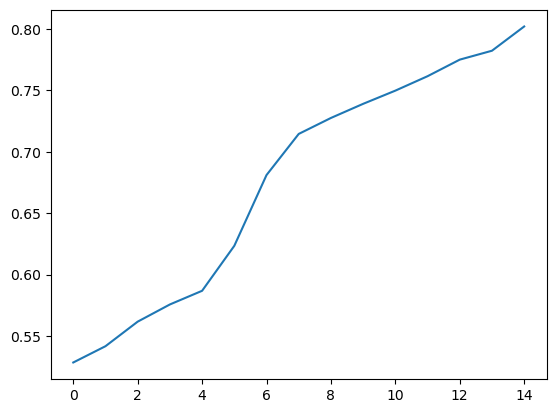

In [60]:
plt.plot(results.history['accuracy'])

In [61]:
model.save('trained_bird_nonbird_model1.h5')